In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [2]:
'''
header = 0 은 파일의 첫 번째 줄에 열 이름이 있음을 나타내며
delimiter = \t 는 필드가 탭으로 구분되는 것을 의미한다.
quoting = 3 은 쌍따옴표를 무시하도록 한다.
'''

#레이블인 sentiment(감정)가 있는 학습 데이터
train = pd.read_csv('data/labeledTrainData.tsv',header=0, 
            delimiter ='\t',quoting=3)

test = pd.read_csv('data/testData.tsv', header=0,
                   delimiter='\t',
                   quoting=3
                 )

train.shape

(25000, 3)

In [3]:
test.shape

(25000, 2)

In [4]:
train.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [5]:
test.head()

,id,review
0,"""12311_10""","""Naturally in a film who's main themes are of ..."
1,"""8348_2""","""This movie is a disaster within a disaster fi..."
2,"""5828_4""","""All in all, this is a movie for kids. We saw ..."
3,"""7186_2""","""Afraid of the Dark left me with the impressio..."
4,"""12128_7""","""A very accurate depiction of small time mob l..."


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         25000 non-null  object
 1   sentiment  25000 non-null  int64 
 2   review     25000 non-null  object
dtypes: int64(1), object(2)
memory usage: 586.1+ KB


In [7]:
train.describe()

,sentiment
count,25000.00000
mean,0.50000
std,0.50001
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [8]:
train['sentiment'].value_counts()

1    12500
0    12500
Name: sentiment, dtype: int64

In [9]:
# html 태그가 섞여있기 때문에 이를 정제해줄 필요가 있음
train['review'][0]

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally

# 텍스트 데이터 전처리
- beautifulSoup을 통해 html 태그를 제거
- 정규표현식으로 알파벳 이외의 문자를 공백으로 치환
- NLTK데이터를 사용해 불용어(stopword)를 제거
- 어간추출(스테밍 Stemming)과 음소 표기법(Lemmatizing)의 개념을 이해하고 SnowballStemmer를 통해 어간을 추출

In [10]:
!pip show BeautifulSoup4

Name: beautifulsoup4
Version: 4.9.1
Summary: Screen-scraping library
Home-page: http://www.crummy.com/software/BeautifulSoup/bs4/
Author: Leonard Richardson
Author-email: leonardr@segfault.org
License: MIT
Location: c:\users\diamond\anaconda3\lib\site-packages
Requires: soupsieve
Required-by: conda-build


In [11]:
from bs4 import BeautifulSoup as bs

In [12]:
example1 = bs(train['review'][0],'html5lib')
print(train['review'][0][:700])
example1.get_text()[:700]

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely lik


'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyw'

In [13]:
# 정규 표현식을 사용해서 특수문자를 제거
import re

# 소문자와 대문자가 아닌 것은 공백으로 대체한다.
# a 부터 z , A 부터 Z가 아니라면 공백으로 대체

letters_only = re.sub('[^a-zA-Z]', ' ', example1.get_text())
letters_only[:700]

' With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyw'

In [14]:
# 모두 소문자로 변환한다.
lower_case = letters_only.lower()

#문자를 나눈다. => 토큰화
words = lower_case.split()

print(len(words))
words[:10]

437


['with',
 'all',
 'this',
 'stuff',
 'going',
 'down',
 'at',
 'the',
 'moment',
 'with']

# 불용어 제거

In [15]:
# pip install nltk

In [16]:
# nltk.download('stopwords')

In [17]:
# nltk.download('wordnet')

In [18]:
import nltk
from nltk.corpus import stopwords
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [19]:
words = [w for w in words if not w in stopwords.words('english')]

# 스테밍(어간 추출 , 형태소 분석)

In [20]:
# 포터 스태머의 예

stemmer = nltk.stem.PorterStemmer()
print(stemmer.stem('maximum'))
print('The stemmed form of running is : {}'.format(stemmer.stem('running')))
print('The stemmed form of runs is : {}'.format(stemmer.stem('runs')))
print('The stemmed form of run is : {}'.format(stemmer.stem('run')))

maximum
The stemmed form of running is : run
The stemmed form of runs is : run
The stemmed form of run is : run


In [21]:
# 랭커스터 스태머의 예

lan_stemmer = nltk.stem.LancasterStemmer()
print(lan_stemmer.stem('maximum'))

maxim


In [22]:
words[:10]

['stuff',
 'going',
 'moment',
 'mj',
 'started',
 'listening',
 'music',
 'watching',
 'odd',
 'documentary']

In [23]:
stemmer = nltk.stem.SnowballStemmer('english')

words = [stemmer.stem(w) for w in words]

words[:10]

['stuff',
 'go',
 'moment',
 'mj',
 'start',
 'listen',
 'music',
 'watch',
 'odd',
 'documentari']

# Lemmatization 음소표기법
- 레마타이제이션은 앞 뒤 문맥을 보고 단어의 의미를 식별하는 것

In [24]:
wordnet_lemmatizer = nltk.stem.WordNetLemmatizer()

In [25]:
words = [wordnet_lemmatizer.lemmatize(w) for w in words]

words[:10]

['stuff',
 'go',
 'moment',
 'mj',
 'start',
 'listen',
 'music',
 'watch',
 'odd',
 'documentari']

# 문자열 처리
- 위에서 간략하게 살펴본 내용을 바탕으로 문자열을 처리해 본다.

In [26]:
def review_to_words( raw_review ):
    # 1.HTML 제거
    review_text = bs(raw_review,'html.parser').get_text()
    # 2.영문자가 아닌 문자는 공백으로 변환
    letter_only = re.sub('[^a-zA-z]', ' ', review_text)
    # 3.소문자 변환
    words = letter_only.lower().split()
    # 4.파이썬에서는 리스트보다 세트로 찾는게 훨씬 빠르다.
    # stopwords를 세트로 변환
    stops = set(stopwords.words('english'))
    # 5.stopwords 불용어 제거
    meaningful_words = [w for w in words if not w in stops]
    # 6. 어간추출
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    # 7. 공백으로 구분된 문자열로 결합하여 결과를 반환
    return( ' '.join(stemming_words))
    

In [27]:
clean_review = review_to_words(train['review'][0])
clean_review

'stuff go moment mj start listen music watch odd documentari watch wiz watch moonwalk mayb want get certain insight guy thought realli cool eighti mayb make mind whether guilti innoc moonwalk part biographi part featur film rememb go see cinema origin releas subtl messag mj feel toward press also obvious messag drug bad kay visual impress cours michael jackson unless remot like mj anyway go hate find bore may call mj egotist consent make movi mj fan would say made fan true realli nice actual featur film bit final start minut exclud smooth crimin sequenc joe pesci convinc psychopath power drug lord want mj dead bad beyond mj overheard plan nah joe pesci charact rant want peopl know suppli drug etc dunno mayb hate mj music lot cool thing like mj turn car robot whole speed demon sequenc also director must patienc saint came film kiddi bad sequenc usual director hate work one kid let alon whole bunch perform complex danc scene bottom line movi peopl like mj one level anoth think peopl stay

In [28]:
train['review'].size

25000

In [29]:
from multiprocessing import Pool

In [30]:
def _apply_df(args):
    df, func, kwargs = args
    return df.apply(func, **kwargs)

def apply_by_multiprocessing(df, func, **kwargs):
    # 키워드 항목 중 workers 파라메터를 꺼냄
    workers = kwargs.pop('workers')
    # 위에서 가져온 workers 수로 프로세스 풀을 정의
    pool = Pool(processes=workers)
    # 실행할 함수와 데이터프레임을 워커의 수 만큼 나눠 작업
    result = pool.map(_apply_df, [(d, func, kwargs)
            for d in np.array_split(df, workers)])
    pool.close()
    # 작업 결과를 합쳐서 반환
    return pd.concat(list(result))

In [31]:
%time train['review_clean'] = train['review'].apply(review_to_words)

Wall time: 2min 7s


In [32]:
train['review_clean'][0]

'stuff go moment mj start listen music watch odd documentari watch wiz watch moonwalk mayb want get certain insight guy thought realli cool eighti mayb make mind whether guilti innoc moonwalk part biographi part featur film rememb go see cinema origin releas subtl messag mj feel toward press also obvious messag drug bad kay visual impress cours michael jackson unless remot like mj anyway go hate find bore may call mj egotist consent make movi mj fan would say made fan true realli nice actual featur film bit final start minut exclud smooth crimin sequenc joe pesci convinc psychopath power drug lord want mj dead bad beyond mj overheard plan nah joe pesci charact rant want peopl know suppli drug etc dunno mayb hate mj music lot cool thing like mj turn car robot whole speed demon sequenc also director must patienc saint came film kiddi bad sequenc usual director hate work one kid let alon whole bunch perform complex danc scene bottom line movi peopl like mj one level anoth think peopl stay

In [33]:
test['review_clean'] = test['review'].apply(review_to_words)

# 워드 클라우드
- 단어의 빈도수 데이터를 가지고 있을때 이용할 수 있는 시각화 방법
- 단순히 빈도수를 표현하기 보다는 상관관계나 유사도 등으로 배치하는게 더 의미잇기 때무넹 큰 정보를 얻기는 어렵다.

In [34]:
from wordcloud import WordCloud, STOPWORDS

In [35]:
def displayWordCloud( data = None, backgroundcolor = 'white',width = 800,height=600):
    wordcloud = WordCloud(stopwords = STOPWORDS,
                          background_color= backgroundcolor,
                          width = width, height=height).generate(data)
    plt.figure(figsize=(15,10))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

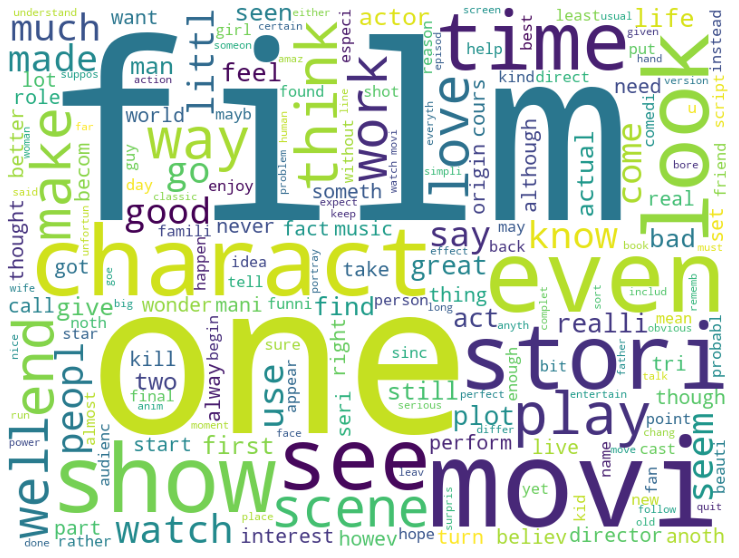

In [36]:
displayWordCloud(' '.join(train['review_clean'].tolist()))

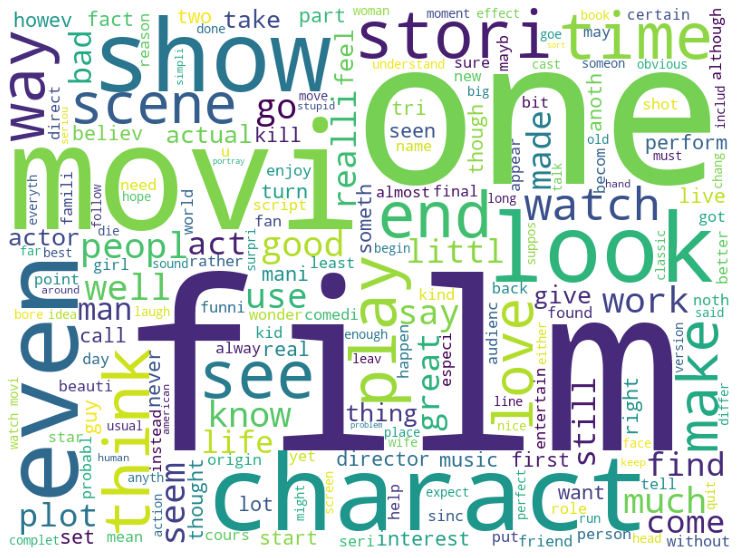

In [37]:
displayWordCloud(' '.join(test['review_clean'].tolist()))

In [38]:
# 단어 수 
train['num_words'] = train['review_clean'].apply(lambda x: len(str(x).split()))
# 중복을 제거한 단어 수
train['num_uniq_words'] = train['review_clean'].apply(lambda x: len(set(str(x).split())))

In [39]:
train.head()

,id,sentiment,review,review_clean,num_words,num_uniq_words
0,"""5814_8""",1,"""With all this stuff going down at the moment ...",stuff go moment mj start listen music watch od...,219,156
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ...",\ classic war worlds\ timothi hine entertain f...,88,65
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell...",film start manag nichola bell give welcom inve...,240,201
3,"""3630_4""",0,"""It must be assumed that those who praised thi...",must assum prais film \ greatest film opera ev...,195,160
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ...",superbl trashi wondrous unpretenti exploit hoo...,213,190


In [40]:
train.describe()

,sentiment,num_words,num_uniq_words
count,25000.00000,25000.000000,25000.000000
mean,0.50000,121.184880,94.822120
std,0.50001,91.964937,62.611276
min,0.00000,4.000000,4.000000
25%,0.00000,64.000000,54.000000
50%,0.50000,90.000000,75.000000
75%,1.00000,148.000000,116.000000
max,1.00000,1419.000000,523.000000


Bag-of-words model - Wikipedia
다음의 두 문장이 있다고 하자,

(1) John likes to watch movies. Mary likes movies too.

(2) John also likes to watch football games.

위 두 문장을 토큰화 하여 가방에 담아주면 다음과 같다.

[
    "John",
    "likes",
    "to",
    "watch",
    "movies",
    "Mary",
    "too",
    "also",
    "football",
    "games"
]
그리고 배열의 순서대로 가방에서 각 토큰이 몇 번 등장하는지 횟수를 세어준다.

(1) [1, 2, 1, 1, 2, 1, 1, 0, 0, 0]
(2) [1, 1, 1, 1, 0, 0, 0, 1, 1, 1]
=> 머신러닝 알고리즘이 이해할 수 있는 형태로 바꿔주는 작업이다.

단어 가방을 n-gram을 사용해 bigram 으로 담아주면 다음과 같다.

[
    "John likes",
    "likes to",
    "to watch",
    "watch movies",
    "Mary likes",
    "likes movies",
    "movies too",
]
=> 여기에서는 CountVectorizer를 통해 위 작업을 한다.

# 사이킷런의 CountVectorizer를 통해 피처 생성
- 정규표현식을 사용해 토큰을 추출한다.
- 모두 소문자로 변환시키기 때문에 good, Good, gOod이 모두 같은 특성이 된다.
- 의미없는 특성을 많이 생성하기 때문에 적어도 두 개의 문서에 나타난 토큰만을 사
용한다.
- min_df로 토큰이 나타날 최소 문서 개수를 지정할 수 있다.

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

In [42]:
# 파라미터 값만 수정해도 캐글 스코어 차이가 많이 남
# 튜토리얼과 다르게 파라메터 값을 수정
vectorizer = CountVectorizer(analyzer = 'word',
                            tokenizer= None,
                            preprocessor=None,
                            stop_words = None,
                            min_df =2, # 토큰이 나타날 최소 문서 개수
                            ngram_range=(1,3),
                            max_features=20000)

vectorizer

CountVectorizer(max_features=20000, min_df=2, ngram_range=(1, 3))

In [43]:
pipeline = Pipeline([('vect',vectorizer),])

In [44]:
%time train_data_features = pipeline.fit_transform(train['review_clean'].tolist())

train_data_features

Wall time: 23.3 s


<25000x20000 sparse matrix of type '<class 'numpy.int64'>'
	with 2756430 stored elements in Compressed Sparse Row format>

In [45]:
train_data_features.shape

(25000, 20000)

In [46]:
vocab = vectorizer.get_feature_names()
print(len(vocab))
vocab[:10]

20000


['aag',
 'aaron',
 'ab',
 'abandon',
 'abbey',
 'abbi',
 'abbot',
 'abbott',
 'abc',
 'abduct']

In [47]:
dist = np.sum(train_data_features,axis = 0)

for tag, count in zip(vocab, dist):
    print(count,tag)
    
pd.DataFrame(dist, columns=vocab)

[[26 48 22 ... 59 40 23]] aag


,aag,aaron,ab,abandon,abbey,abbi,abbot,abbott,abc,abduct,...,zombi film,zombi flick,zombi movi,zombie,zone,zoo,zoom,zorro,zu,zucker
0,26,48,22,287,24,30,29,30,125,55,...,50,37,85,34,161,31,71,59,40,23


In [48]:
pd.DataFrame(train_data_features[:10].toarray(), columns=vocab).head()

,aag,aaron,ab,abandon,abbey,abbi,abbot,abbott,abc,abduct,...,zombi film,zombi flick,zombi movi,zombie,zone,zoo,zoom,zorro,zu,zucker
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 랜덤포레스트
- 랜덤포레스트는 분류,회귀분석등에 사용되는 앙상블 학습방법의 일종으로, 훈련 과정에서 구성한 다수의 결정 트리로부터 분류 또는 예측치를 출력함으로써 동작한다.

In [49]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100,
                               n_jobs=-1,
                               random_state=2018)

forest

RandomForestClassifier(n_jobs=-1, random_state=2018)

In [50]:
%time forest.fit(train_data_features,train['sentiment'])

Wall time: 40.9 s


RandomForestClassifier(n_jobs=-1, random_state=2018)

In [51]:
from sklearn.model_selection import cross_val_score

%time score = np.mean(cross_val_score(forest,train_data_features,train['sentiment'],cv=10,scoring = 'roc_auc'))

Wall time: 7min 8s


In [52]:
score

0.927493216

In [53]:
train.tail()

,id,sentiment,review,review_clean,num_words,num_uniq_words
24995,"""3453_3""",0,"""It seems like more consideration has gone int...",seem like consider gone imdb review film went ...,42,38
24996,"""5064_1""",0,"""I don't believe they made this film. Complete...",believ made film complet unnecessari first fil...,97,77
24997,"""10905_3""",0,"""Guy is a loser. Can't get girls, needs to bui...",guy loser get girl need build pick stronger su...,60,46
24998,"""10194_3""",0,"""This 30 minute documentary Buñuel made in the...",minut documentari bu uel made earli one spain ...,99,76
24999,"""8478_8""",1,"""I saw this movie as a child and it broke my h...",saw movi child broke heart stori unfinish end ...,80,63


In [54]:
clean_test_reviews = test['review_clean'].tolist()
clean_test_reviews[0]

'natur film main theme mortal nostalgia loss innoc perhap surpris rate high older viewer younger one howev craftsmanship complet film anyon enjoy pace steadi constant charact full engag relationship interact natur show need flood tear show emot scream show fear shout show disput violenc show anger natur joyc short stori lend film readi made structur perfect polish diamond small chang huston make inclus poem fit neat truli masterpiec tact subtleti overwhelm beauti'

In [55]:
%time test_data_features = pipeline.transform(clean_test_reviews)
test_data_features = test_data_features.toarray()

Wall time: 15.7 s


In [57]:
test_data_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [58]:
test_data_features[5][:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [60]:
result = forest.predict(test_data_features)
result[:10]

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 1], dtype=int64)

In [84]:
# 예측 결과를 저장하기 위해 데이터프레임에 담아 준다.
output = pd.DataFrame(data={'id':test['id'], 'sentiment':result})
output.head()

,id,sentiment
0,"""12311_10""",1
1,"""8348_2""",0
2,"""5828_4""",1
3,"""7186_2""",1
4,"""12128_7""",1


In [86]:
output.to_csv('data/tutorial_1_BOW_{0:.5f}.csv'.format(score), index=False, quoting=3)

In [89]:
output_sentiment = output['sentiment'].value_counts()
output_sentiment

1    12563
0    12437
Name: sentiment, dtype: int64

In [90]:
pd.read_csv('data/tutorial_1_BOW_0.92749.csv')

,id,sentiment
0,12311_10,1
1,8348_2,0
2,5828_4,1
3,7186_2,1
4,12128_7,1
...,...,...
24995,2155_10,1
24996,59_10,1
24997,2531_1,0
24998,7772_8,1
